Integrantes  
Bryann Alfaro  
Raul Jimenez  
Donaldo Garcia

In [2]:
pip install scapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444345 sha256=cd5fc7d1acf77b1061c0280b06bcf4191e175ef891136e32b6a12746dbca65c1
  Stored in directory: /root/.cache/pip/wheels/dd/1b/47/d46b1a87e339be501612cf4cd1bf57742e534f9c9aac7b00d6
Successfully built scapy


## Parte 1 - Analisis de paquetes

 Analisis estadistico

In [3]:
from scapy.all import * # Packet manipulation
import pandas as pd # Pandas - Create and Manipulate DataFrames
import numpy as np # Math Stuff (don't worry only used for one line :] )
import binascii # Binary to Ascii 
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

REFERENCIA: JUPYTER BRINDADO EN CLASE

Capture 10 paquetes con la herramienta scapy, imprima el tipo de datos, la longitud y el
contenido del pcap

In [18]:
pcap = sniff(count=10) #captura de 10 paquetes

In [19]:
#Impresion de tipo de dato, longitud y contenido
print(type(pcap))
print(len(pcap))
for i in range(len(pcap)):
  print(pcap[i])
pcap[0]

<class 'scapy.plist.PacketList'>
10
Ether / IP / TCP 172.28.0.12:8080 > 172.28.0.1:56898 PA / Raw
Ether / IP / TCP 172.28.0.1:56898 > 172.28.0.12:8080 A
Ether / IP / TCP 172.28.0.1:56898 > 172.28.0.12:8080 PA / Raw
Ether / IP / TCP 172.28.0.12:8080 > 172.28.0.1:56898 A
Ether / IP / TCP 172.28.0.12:8080 > 172.28.0.1:56898 PA / Raw
Ether / IP / TCP 172.28.0.1:56898 > 172.28.0.12:8080 A
Ether / IP / TCP 172.28.0.1:56898 > 172.28.0.12:8080 PA / Raw
Ether / IP / TCP 172.28.0.1:56898 > 172.28.0.12:8080 PA / Raw
Ether / IP / TCP 172.28.0.12:8080 > 172.28.0.1:56898 A
Ether / IP / TCP 172.28.0.12:8080 > 172.28.0.1:56898 PA / Raw


<Ether  dst=02:42:3a:e4:6d:ac src=02:42:ac:1c:00:0c type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=1000 id=21330 flags=DF frag=0 ttl=64 proto=6 chksum=0x8b78 src=172.28.0.12 dst=172.28.0.1 |<TCP  sport=8080 dport=56898 seq=942073249 ack=375769217 dataofs=8 reserved=0 flags=PA window=501 chksum=0x5c20 urgptr=0 options=[('NOP', None), ('NOP', None), ('Timestamp', (2734976252, 119251873))] |<Raw  load='HTTP/1.1 200 OK\r\nContent-Type: text/plain; charset=UTF-8\r\nContent-Length: 719\r\nAccess-Control-Allow-Origin: *\r\nSet-Cookie: io=J2RYYCsIYANgf_FJAAAA; Path=/; HttpOnly\r\nDate: Sat, 08 Apr 2023 20:18:01 GMT\r\nConnection: keep-alive\r\n\r\n715:42/session,["data",{"data":"{\\"header\\": {\\"msg_id\\": \\"9a498ad8-0d5b94906e7082387bf0d1d5_326\\", \\"msg_type\\": \\"status\\", \\"username\\": \\"username\\", \\"session\\": \\"9a498ad8-0d5b94906e7082387bf0d1d5\\", \\"date\\": \\"2023-04-08T20:18:01.747041Z\\", \\"version\\": \\"5.3\\"}, \\"msg_id\\": \\"9a498ad8-0d5b94906e7082387bf0d1d5_326\\

Para conocer un poco mas se puede hacer la exploracion

In [20]:
ethernet_frame = pcap[0]
ip_packet = ethernet_frame.payload
segment = ip_packet.payload
data = segment.payload #recupera la informacion de la capa 4

print("Informacion del frame:")
print(ethernet_frame.summary())

print("Informacion del paquete:")
print(ip_packet.summary())

print("Informacion del segmento:")
print(segment.summary())

print("Data:")
print(data.summary())

ethernet_frame.show()
data.show()

Informacion del frame:
Ether / IP / TCP 172.28.0.12:8080 > 172.28.0.1:56898 PA / Raw
Informacion del paquete:
IP / TCP 172.28.0.12:8080 > 172.28.0.1:56898 PA / Raw
Informacion del segmento:
TCP 172.28.0.12:8080 > 172.28.0.1:56898 PA / Raw
Data:
Raw
###[ Ethernet ]### 
  dst       = 02:42:3a:e4:6d:ac
  src       = 02:42:ac:1c:00:0c
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 1000
     id        = 21330
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = 6
     chksum    = 0x8b78
     src       = 172.28.0.12
     dst       = 172.28.0.1
     \options   \
###[ TCP ]### 
        sport     = 8080
        dport     = 56898
        seq       = 942073249
        ack       = 375769217
        dataofs   = 8
        reserved  = 0
        flags     = PA
        window    = 501
        chksum    = 0x5c20
        urgptr    = 0
        options   = [('NOP', None), ('NOP', None), ('Timestamp', (2734976252, 119251873

In [21]:
pcap2 = rdpcap('/analisis_paquetes.pcap')

In [22]:
print(len(pcap2))

62


In [23]:
print(len(pcap))

10


Convierta el pcap a un DataFrame  
Se saca el DF de ambos pcap y luego se unen 

In [24]:
# Obtenemos los campos de IP/TCP/UDP que seran las columnas de nuestro DF
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

#Concatenamos todos los campos
dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex']

# Creamos un DF en blanco con los campos como columnas
df = pd.DataFrame(columns=dataframe_fields)
for packet in pcap[IP]:
    # Obtenemos los valores de los campos de cada fila
    field_values = []
    # A;adimos todos los valores de los campos de IP al df
    for field in ip_fields:
        if field == 'options':
            # Obtenemos el numero de opciones del IP Header
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])
    
    field_values.append(packet.time)
    
    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field == 'options':
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)
    
    # Agregamos el payload
    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    # Agregamos la fila al df
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)

# Reset Index
df = df.reset_index()
# Drop old index column
df = df.drop(columns="index")

print(df.head(5))

  version ihl tos   len     id flags frag ttl proto chksum  ... dataofs  \
0       4   5   0  1000  21330    DF    0  64     6  35704  ...       8   
1       4   5   0    52  10535    DF    0  64     6  47447  ...       8   
2       4   5   0   545  10536    DF    0  64     6  46953  ...       8   
3       4   5   0    52  21331    DF    0  64     6  36651  ...       8   
4       4   5   0  1070  21332    DF    0  64     6  35632  ...       8   

  reserved flags  window chksum urgptr options payload  \
0        0    PA     501  23584      0       3     948   
1        0     A     501  22636      0       3       0   
2        0    PA     501  23129      0       3     493   
3        0     A     501  22636      0       3       0   
4        0    PA     501  23654      0       3    1018   

                                         payload_raw  \
0  b'HTTP/1.1 200 OK\r\nContent-Type: text/plain;...   
1                                                b''   
2  b'GET /socket.io/?EIO=3&sid=J

In [25]:
# Obtenemos los campos de IP/TCP/UDP que seran las columnas de nuestro DF
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

#Concatenamos todos los campos
dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex']

# Creamos un DF en blanco con los campos como columnas
df2 = pd.DataFrame(columns=dataframe_fields)
for packet in pcap2[IP]:
    # Obtenemos los valores de los campos de cada fila
    field_values = []
    # A;adimos todos los valores de los campos de IP al df
    for field in ip_fields:
        if field == 'options':
            # Obtenemos el numero de opciones del IP Header
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])
    
    field_values.append(packet.time)
    
    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field == 'options':
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)
    
    # Agregamos el payload
    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    # Agregamos la fila al df
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df2 = pd.concat([df2, df_append], axis=0)

# Reset Index
df2 = df2.reset_index()
# Drop old index column
df2 = df2.drop(columns="index")

print(df2.head(5))

  version ihl tos   len     id flags frag  ttl proto chksum  ... dataofs  \
0       4   5   0   961      1          0   64    17  21222  ...    None   
1       4   5  32    84  58919          0  122    17  13836  ...    None   
2       4   5   0   975      1          0   64    17  21208  ...    None   
3       4   5  32    84  59493          0  122    17  13262  ...    None   
4       4   5   0  1012      1          0   64    17  21171  ...    None   

  reserved flags window chksum urgptr options payload  \
0     None  None   None  62990   None    None     933   
1     None  None   None  65061   None    None      56   
2     None  None   None  36378   None    None     947   
3     None  None   None  65063   None    None      56   
4     None  None   None  63846   None    None     984   

                                         payload_raw  \
0  b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...   
1  b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...   
2  b'\x00\x0c\x01\x00\x00\x01\x0

Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port

In [26]:
df_new = pd.concat([df,df2])

In [27]:
df_new.columns

Index(['version', 'ihl', 'tos', 'len', 'id', 'flags', 'frag', 'ttl', 'proto',
       'chksum', 'src', 'dst', 'options', 'time', 'sport', 'dport', 'seq',
       'ack', 'dataofs', 'reserved', 'flags', 'window', 'chksum', 'urgptr',
       'options', 'payload', 'payload_raw', 'payload_hex'],
      dtype='object')

In [28]:
df_new.shape

(72, 28)

In [29]:
df_new['src']

0     172.28.0.12
1      172.28.0.1
2      172.28.0.1
3     172.28.0.12
4     172.28.0.12
         ...     
57    84.54.22.33
58     10.1.10.53
59    84.54.22.33
60     10.1.10.53
61    84.54.22.33
Name: src, Length: 72, dtype: object

In [30]:
df_new['src'].value_counts()

10.1.10.53     31
84.54.22.33    29
172.28.0.12     5
172.28.0.1      5
75.75.75.75     2
Name: src, dtype: int64

In [31]:
df_new['dst']

0      172.28.0.1
1     172.28.0.12
2     172.28.0.12
3      172.28.0.1
4      172.28.0.1
         ...     
57     10.1.10.53
58    84.54.22.33
59     10.1.10.53
60    84.54.22.33
61     10.1.10.53
Name: dst, Length: 72, dtype: object

In [32]:
df_new['dst'].value_counts()

10.1.10.53     31
84.54.22.33    29
172.28.0.1      5
172.28.0.12     5
75.75.75.75     2
Name: dst, dtype: int64

In [33]:
df_new['sport']

0      8080
1     56898
2     56898
3      8080
4      8080
      ...  
57       53
58       53
59       53
60       53
61       53
Name: sport, Length: 72, dtype: object

In [34]:
df_new['sport'].value_counts()

53       60
8080      5
56898     5
15812     1
23903     1
Name: sport, dtype: int64

In [35]:
df_new['dport']

0     56898
1      8080
2      8080
3     56898
4     56898
      ...  
57       53
58       53
59       53
60       53
61       53
Name: dport, Length: 72, dtype: object

In [36]:
df_new['dport'].value_counts()

53       60
56898     5
8080      5
15812     1
23903     1
Name: dport, dtype: int64

# Estadísticas

In [40]:
#Muestre cual es la IP origen más frecuente
source_ip = df_new['src'].value_counts(ascending=False).index[0]
source_ip

'10.1.10.53'

In [41]:
#Muestre cual es la IP destino más frecuente
dest_ip = df_new['dst'].value_counts(ascending=False).index[0]
dest_ip

'10.1.10.53'

In [42]:
#¿A qué IPs se comunica la IP del inciso a?
df_new[df_new['src']==source_ip][['src','dst']]

,src,dst
0,10.1.10.53,84.54.22.33
2,10.1.10.53,84.54.22.33
4,10.1.10.53,84.54.22.33
6,10.1.10.53,84.54.22.33
8,10.1.10.53,84.54.22.33
10,10.1.10.53,84.54.22.33
12,10.1.10.53,84.54.22.33
14,10.1.10.53,84.54.22.33
16,10.1.10.53,84.54.22.33
18,10.1.10.53,84.54.22.33


In [45]:
#¿A qué puertos destino se comunica la IP del inciso a?
df_new[df_new['src']==source_ip][['src','dport']]

,src,dport
0,10.1.10.53,53
2,10.1.10.53,53
4,10.1.10.53,53
6,10.1.10.53,53
8,10.1.10.53,53
10,10.1.10.53,53
12,10.1.10.53,53
14,10.1.10.53,53
16,10.1.10.53,53
18,10.1.10.53,53


In [46]:
#¿A qué puertos origen se comunica la IP del inciso b?
df_new[df_new['dst']==dest_ip][['dst','sport']]

,dst,sport
1,10.1.10.53,53
3,10.1.10.53,53
5,10.1.10.53,53
7,10.1.10.53,53
9,10.1.10.53,53
11,10.1.10.53,53
13,10.1.10.53,53
15,10.1.10.53,53
17,10.1.10.53,53
19,10.1.10.53,53


#Indique el propósito de los puertos que más aparece en los incisos d y e
En este caso el puerto que mas aparece es el puerto 53 el cual es utilizado por servicios DNS y permite usar tanto TCP como UDP para comunicarse con servidores DNS. 

# Graficas

<Axes: ylabel='src'>

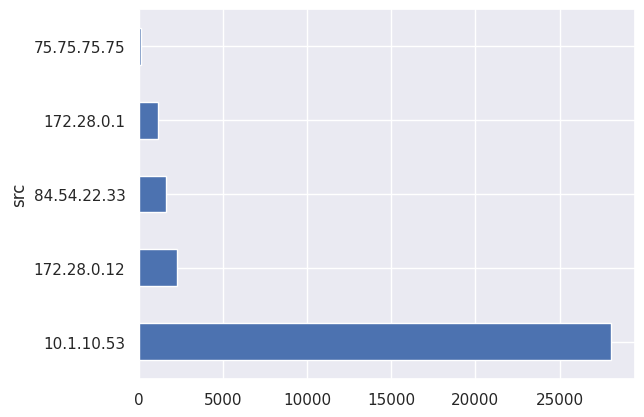

In [55]:
#Muestre una gráfica 2D, en el eje Y las IPs origen, y en el eje X la suma de los payloads
#enviados de dichas direcciones.
import matplotlib.pyplot as plt

df_new.groupby('src')['payload'].sum().sort_values(ascending=False).plot.barh(x='payload')